In [1]:
# Working notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spectral


In [2]:
# Read the CSV file using HP330 class
hp330 = spectral.HP330()
file_path = 'data/broad.csv'
df = hp330.read_file(file_path)

# Display first few rows
print(f"Total data points: {len(df)}")
print(f"Wavelength range: {df['wavelength'].min()}nm - {df['wavelength'].max()}nm")
print("\nFirst 10 rows:")
df.head(10)


Total data points: 401
Wavelength range: 380nm - 780nm

First 10 rows:


,wavelength,intensity
0,380,0.003049
1,381,0.002975
2,382,0.002944
3,383,0.002810
4,384,0.002723
5,385,0.002642
6,386,0.002547
7,387,0.002535
8,388,0.002538
9,389,0.002508


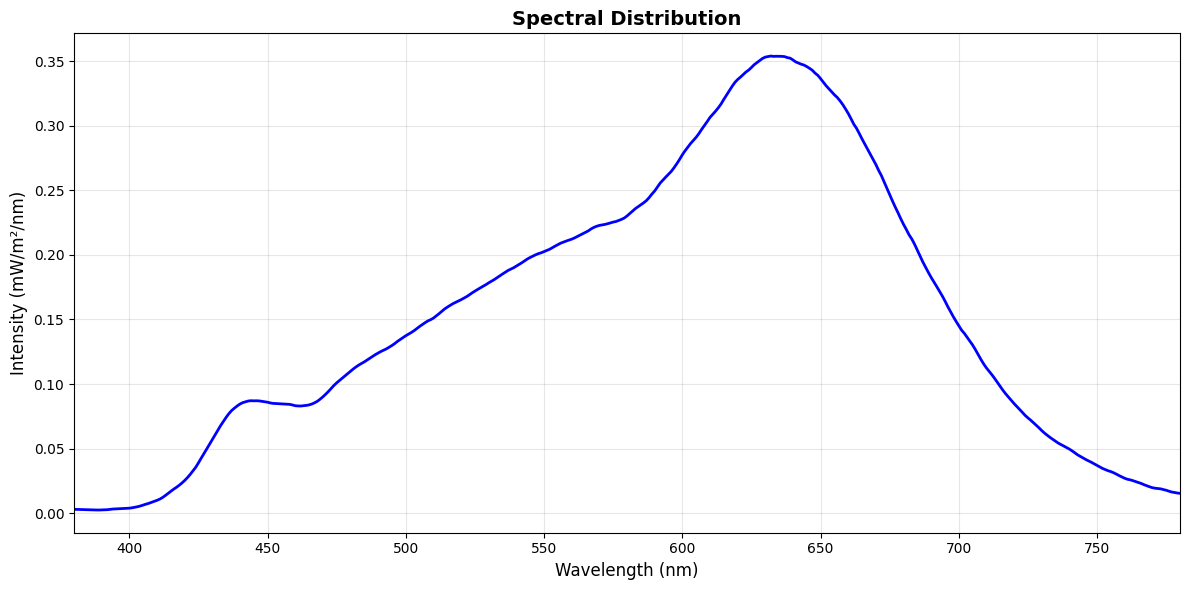

In [3]:
# Plot the spectral data
plt.figure(figsize=(12, 6))
plt.plot(df['wavelength'], df['intensity'], linewidth=2, color='blue')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Intensity (mW/m²/nm)', fontsize=12)
plt.title('Spectral Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(df['wavelength'].min(), df['wavelength'].max())
plt.tight_layout()
plt.show()


In [4]:
# Calculate attenuation using Filter class
filter_obj = spectral.Filter()
attenuation_df = filter_obj.calculate_attenuation(
    transmitted_file='data/broad-paper.csv',
    incident_file='data/broad.csv'
)

# Display first few rows
print(f"Total data points: {len(attenuation_df)}")
print(f"Wavelength range: {attenuation_df['wavelength'].min()}nm - {attenuation_df['wavelength'].max()}nm")
print("\nFirst 10 rows:")
attenuation_df.head(10)


Total data points: 401
Wavelength range: 380nm - 780nm

First 10 rows:


,wavelength,attenuation
0,380,0.168252
1,381,0.156975
2,382,0.166101
3,383,0.182562
4,384,0.186559
5,385,0.196821
6,386,0.211622
7,387,0.226036
8,388,0.243105
9,389,0.263158


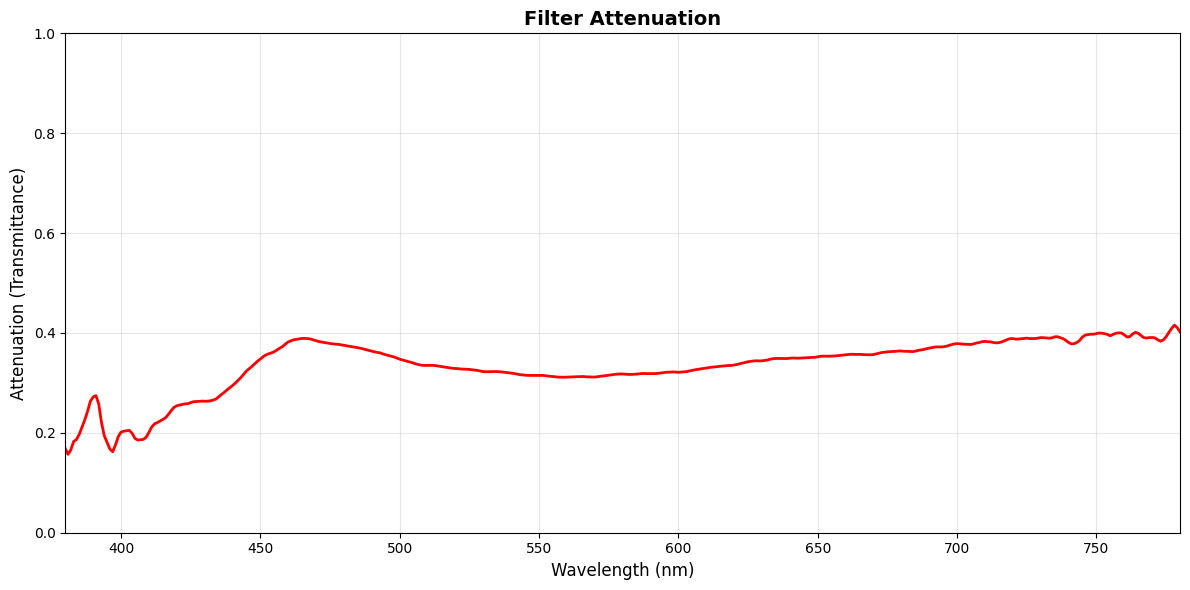

In [5]:
# Plot the attenuation
plt.figure(figsize=(12, 6))
plt.plot(attenuation_df['wavelength'], attenuation_df['attenuation'], linewidth=2, color='red')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Attenuation (Transmittance)', fontsize=12)
plt.title('Filter Attenuation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(attenuation_df['wavelength'].min(), attenuation_df['wavelength'].max())
plt.ylim(0, 1)  # Attenuation is typically between 0 and 1
plt.tight_layout()
plt.show()
